# CoderHouse: Carrera de Data Sciencie

## Data Science I: Fundamentos para la Ciencia de Datos

### Alumno: Pablo Sotomayor 

### Comisión: 61750

## Introducción

La fidelización de los clientes es un punto central de las compañias en la actualidad. Las compañias se desarrollan, existen y se sostienen debido a la existencia de los mismos. Esta situacion se profundiza aún mas cuando hablamos de instituciones financieras tradicionales, las cuales en los últimos años han enfrentado una competencia sin precedentes(debido a los nuevos formatos de instituciones financieras). 
Por tal motivo el análisis y la predicción de la perdida o deserción de clientes es fundamental para la toma de desiciones, de los bancos tradicionales, en relación a las politicas de retención de cartera (clientes).
Como respuesta a ello, este trabajo se centra en la exploración, analisis y tratamiento de un conjunto de datos relacionados con la deserción de clientes y, en consecuencia, en la construcción de un modelo de clasificación que predice si un cliente abandonará el banco o no.  

## Descripción del Problema

La deserción de clientes es un problema que pone en riesgo las ganancias de la compañia (el banco), asi como también, su estabilidad y solvencia. Desarrollar un modelo predictivo clasificatorio, con la calidad suficiente, que arroje diferentes insights, es de suma importancia para la toma de decisiones en relación a la retención de clientes. 

## Objetivo

El objetivo primordial de este trabajo es construir un modelo de aprendizaje supervisado calsificatorio, que sea capaz de predecir si un cliente va a abandonar el banco o no. 


## Fuente de datos

El dataset empleado en este trabajo fue obtenido de Kaggle: 

https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

Este dataset cuenta con información relevante acerca de clientes, características de los mismos y perfil bancario de estos (productos, antiguedad, puntaje crediticio, etc). Esta información nos permitirá crear un modelo predictivo para determinar la desercion de clientes. 


## Importación de Librerías

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y ordenamiento de datos

In [159]:
url = 'https://raw.githubusercontent.com/Psotomay/CoderDS1/refs/heads/main/Bank%20Customer%20Churn%20Prediction(abando%20del%20banco%20o%20no).csv'
df = pd.read_csv(url,index_col=False)#.sort_index(axis=0)#index_col=0
df.sort_values(by='customer_id',ignore_index=True,inplace=True,na_position='first') 
df.head(6).round(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
1,15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
2,15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
3,15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
4,15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
5,15565806,532,France,Male,38,9,0.00,2,0,0,30583.95,0


## Exploración o Minería de Datos

El propósito de la exploración de datos es descubrir patrones y relaciones entre las variables de un conjunto de datos. Para realizar este cometido vamos a analizar el conjunto de datos para comprender sus características y distribuciones. 
- Resumen Inicial: Visualizar la metadata del conjunto de datos, obtener una primera vista de los mismos y mostrar las primeras y últimas filas del DF. 
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Establecer relaciones: Determinar posibles relaciones entre las variables de input y la variable target. Realizar Hipotesis. 
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos y mostrar relaciones.

In [160]:
df.shape

(10000, 12)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB



El dataset contiene 10 mil registros (filas) y 12 columnas. Las columnas son nuestras variables. Dentro de las variables se encuentra el customer_id que no se utilizaría para establecer relaciones. Tenemos también 10 variables que son variables de entrada, que podrían utilizarse para establecer relaciones. Por último tenemos la variable churn que sería nuestra variable target, es decir, la variable a predecir.
Por otro lado observamos que no hay datos faltantes o vacíos ya que en todas las columnas los non null son 10 mil al igual que la cantidad de registros. 

-------------------------------------------------------------

**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir la deserción o el abandono de un cliente podrían ser: "credit_score", "tenure", "balance", "products_number", "credit_card" y "estimated_salary".

In [162]:
df.head(20).round(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
1,15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
2,15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
3,15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
4,15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
5,15565806,532,France,Male,38,9,0.00,2,0,0,30583.95,0
6,15565878,631,Spain,Male,29,3,0.00,2,1,1,197963.46,0
7,15565879,845,France,Female,28,9,0.00,2,1,1,56185.98,0
8,15565891,709,France,Male,39,8,0.00,2,1,0,56214.09,0
9,15565996,653,France,Male,44,8,0.00,2,1,1,154639.72,0


In [163]:
df.tail(20).round(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9980,15815259,835,France,Female,56,2,0.00,2,1,1,39820.13,0
9981,15815271,755,Germany,Male,43,6,165048.50,3,1,0,16929.41,1
9982,15815295,662,France,Female,38,2,96479.81,1,1,0,120259.41,0
9983,15815316,644,France,Male,50,9,76817.00,4,1,0,196371.13,1
9984,15815364,736,Spain,Female,28,2,0.00,2,1,1,117431.10,0
9985,15815420,808,Spain,Male,47,8,139196.00,1,0,1,74028.36,0
9986,15815428,823,France,Male,34,3,105057.33,1,1,0,9217.92,0
9987,15815443,527,Spain,Female,46,10,131414.76,1,1,0,54947.51,0
9988,15815490,670,Germany,Male,40,2,164948.98,3,0,0,177028.00,1
9989,15815530,612,France,Female,42,10,75497.51,1,0,0,149682.78,0


In [164]:
df.iloc[:,1:].describe().round(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


**Credit_score:** 
- Se observa que las filas no nulas son 10 mil. Por ende no hay nulos.
- El promedio del puntaje crediticio es 650,53.
- El puntaje crediticio minimo es 350 mientras que el maximo es 850.
- La desviación estandar es de 96,65 por lo cual es baja e indica que los valores se encuentran cerca de la media.

**Tenure:** 
- No hay valores nulos.
- El promedio de la permanencia de los clientes es de 5 años aproximadamente.
- El valor minimo es 0 y el maximo 10 años. El 0 no es un valor atípico ya que no se encuentra distante de los demas y es un caso común. 
- La std es de 2,89. Si tenemos en cuenta la unidad de medida es alta. En este caso podría indicar que los valores se encuentran lejos o dispersos en relación a la media.

**Balance:** 
- No hay nulos.
- El promedio de los saldos es 76485,89.
- El minimo es 0 y el máximo es 250898,08. Esto podría indicar que 0 es un valor atípico. Tambien el maximo ya que esta muy lejos del promedio.
- La desviación estándar es alta. Esto nos indicaría que los valores se encuentran lejos de la media. Pero tambien la std podría verse afectada por los valores atípicos.

**Products_number:**
- no hay nulos
- El promedio de la cantidad de productos es 1.53
- El minimo es 1 y el maximo 4.

**Credit_card:** 
- El 70 por ciento de los clientes tiene tarjeta de credito.

**Churn:**
- Aproximadamente el 20 % de los clientes abandono el banco. 


### Hipótesis: 

1. Existe una diferencia en cuanto al nivel de deserción de acuerdo al país del cliente. 
2. Existe una diferencia en cuanto al nivel de deserción de acuerdo al genero del cliente.
3. El abandono del banco varía linealmente en relación con el puntaje crediticio: a menor credit_score mas deserción.
4. Cuanto mayor es el tiempo de permanencia menor es la deserción.
5. La deserción aumenta cuando disminuye el saldo de la cuenta: a menor saldo mas abandono. 
6. A menor cantidad de productos mayor deserción. Es decir la permanencia aumenta con la cantidad de productos. 

### Diferencia de abandono por país

In [165]:
# calculamos el numero de casos de abandono por país. numero sin tener en cuenta la cantidad de clientes por pais. 
churn_by_country_sum = df.groupby('country')['churn'].sum()
# Porcentaje de abandono de cada pais. Se tiene en cuenta la cantidad de clientes. 
churn_by_country_percentage = df.groupby('country')['churn'].mean() * 100
print(churn_by_country_sum,
churn_by_country_percentage)

country
France     810
Germany    814
Spain      413
Name: churn, dtype: int64 country
France     16.154767
Germany    32.443204
Spain      16.673395
Name: churn, dtype: float64


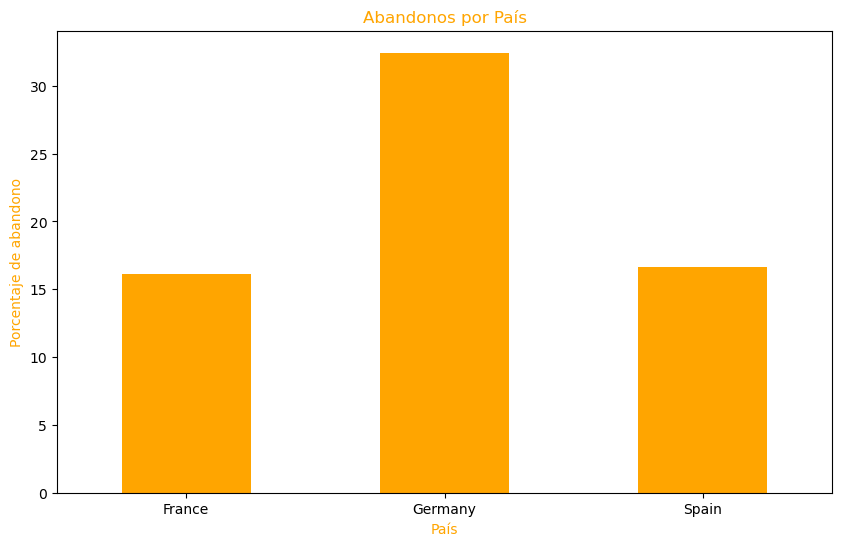

In [166]:
plt.figure(figsize=(10, 6))
churn_by_country_percentage.plot(kind='bar', rot=0,color='orange')
plt.xlabel('País',color = 'orange')
plt.ylabel('Porcentaje de abandono',color = 'orange')
plt.title('Abandonos por País',color = 'orange')

plt.show()


Podemos observar que hay una significativa diferencia entre Alemania y los otros países (Francia y España) en cuanto a la deserción de clientes. Si bien en cuanto al número de deserciones, Francia y Alemania tienen números similares ( Francia 810 y Alemania 814) cuando analizamos los porcentajes Alemania posee el doble de abandonos que Francia y España. Esto se debe a que Francia tiene el doble de clientes que Alemania.
En conclusion: Alemania, con un 32% posee el indicador mas grande de deserciones y las probabilidades mas grandes de deserción. Francia y España estan ambos muy parejos compartiendo el segundo lugar con un 16%. 

### Diferencia por Género

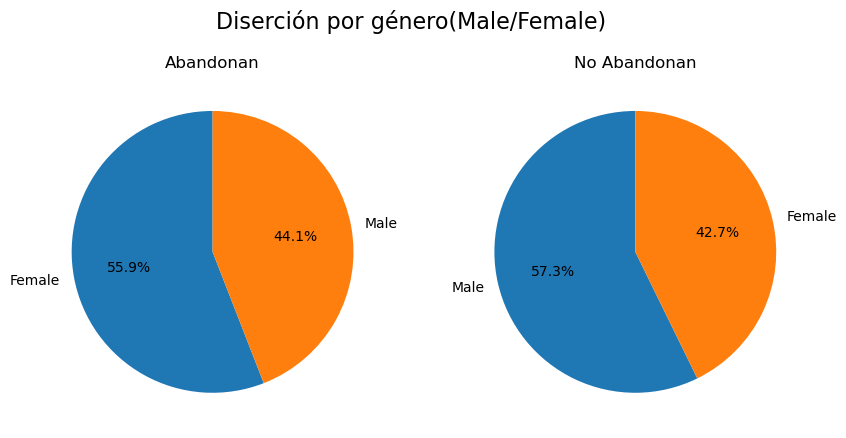

In [167]:
#Filtramos para que solo traiga Male y Female. Esto es por si hay algun dato sucio que en esta columna no tenga alguno de esos valores. 
filtered_df = df[df['gender'].isin(['Male', 'Female'])]
# Calculo porcentaje para los que abandonan. No hacemos por 100 por que el grafico de torta lo calcula solo.  
gender_churn = df[filtered_df['churn'] == 1].value_counts(subset='gender',normalize=True)
#No abandonan
gender_no_churn = df[filtered_df['churn'] == 0].value_counts(subset='gender',normalize=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Grafico para los que abandonan
ax[0].pie(gender_churn, labels=gender_churn.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Abandonan')

#Grafico para los que no abandonan
ax[1].pie(gender_no_churn, labels=gender_no_churn.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('No Abandonan')

plt.suptitle('Diserción por género(Male/Female)', fontsize=16)
plt.show()


Como vemos en los gráficos no hay una diferencia sustancial ni un patron relacional entre los abandonos por género. Es apenas un tanto mas elevado en las mujeres pero no se puede establer una relacion entre el género y las deserciones.  

### Diserción y puntaje crediticio

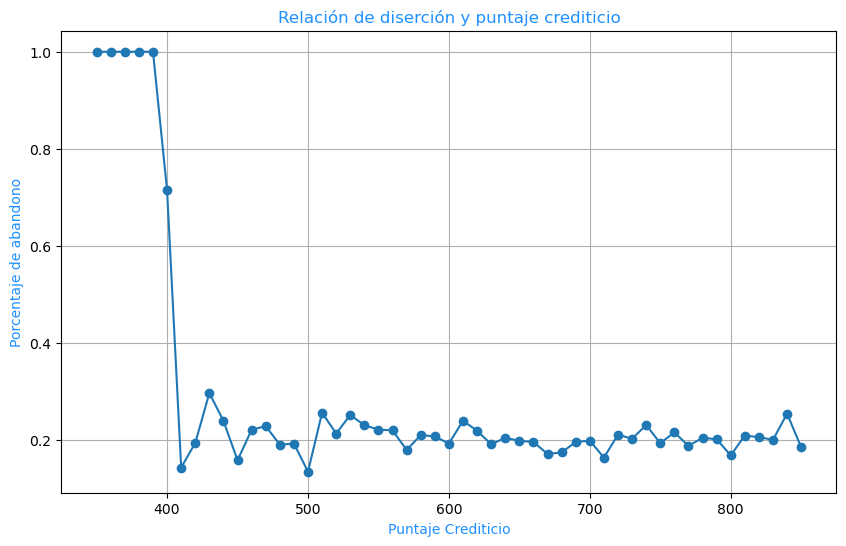

In [168]:
# nueva columna para agrupar de a 100 los valores. 
df['credit_score_group'] = (df['credit_score'] // 10) * 10
churn_by_credit_percentage = df.groupby('credit_score_group')['churn'].mean()

#churn_df = pd.DataFrame({'credit_score':churn_by_credit_percentage.index,'churn':churn_by_credit_percentage.values})

plt.figure(figsize=(10, 6))
#plt.plot(churn_df['credit_score'],churn_df['churn'], marker='o', linestyle='--')
plt.plot(churn_by_credit_percentage.index,churn_by_credit_percentage.values, marker='o')
plt.xlabel('Puntaje Crediticio', color='dodgerblue')
plt.ylabel('Porcentaje de abandono', color='dodgerblue')
plt.title('Relación de diserción y puntaje crediticio', color='dodgerblue')
plt.grid(True)

plt.show()




Observamos que, si bien en el primer percentil de 300 a 400 se produce el pico de abandonos o deserciones, pico muy alto, luego en los otros percentiles se mantiene constante el porcentaje mencionado. Por ende la relacion o variación no es lineal: a menor puntaje crediticio no hay mayor diserción. Se observa que el foco de abandonos se da solo en los clientes que poseen el menor puntaje crediticio. 

### Diserción y permanencia

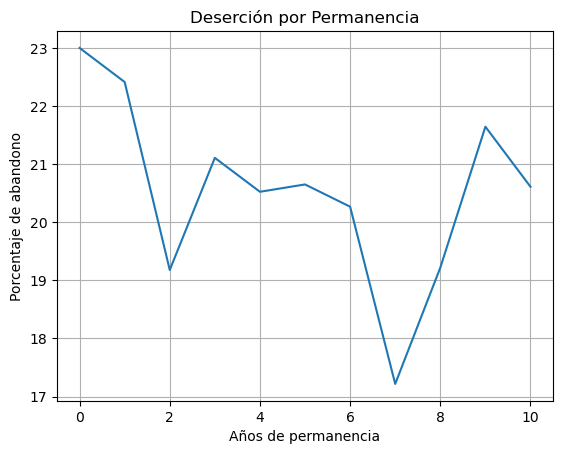

In [169]:
churn_by_tenure = df.groupby('tenure')['churn'].mean() * 100
churn_by_tenure_df = pd.DataFrame({'Tenure': churn_by_tenure.index, 'Churn': churn_by_tenure.values})

#plt.figure()
ax = sns.lineplot(data=churn_by_tenure_df,x='Tenure', y='Churn') #sns.relplot(x = "x", y = "y", data = df, kind = "line");
ax.set(xlabel='Años de permanencia', ylabel='Porcentaje de abandono', title='Deserción por Permanencia')
ax.grid()


En este gráfico observamos que tampoco hay una correlacion lineal entre los años de permanencia y la deserción de los clientes. No es una relación lineal. Es decir no encontramos un patrón en el cual a mayor permanencia menor deserción. Salvo en el primer estrato que a menos años (0 a 1) mayor porcentaje de abandono despues es muy inestable. Por ejemplo de 6a 8 años es el pico minimo de abandonos. Pero a los 9 sube considerablemente. 

### Deserción y Saldo de cuenta

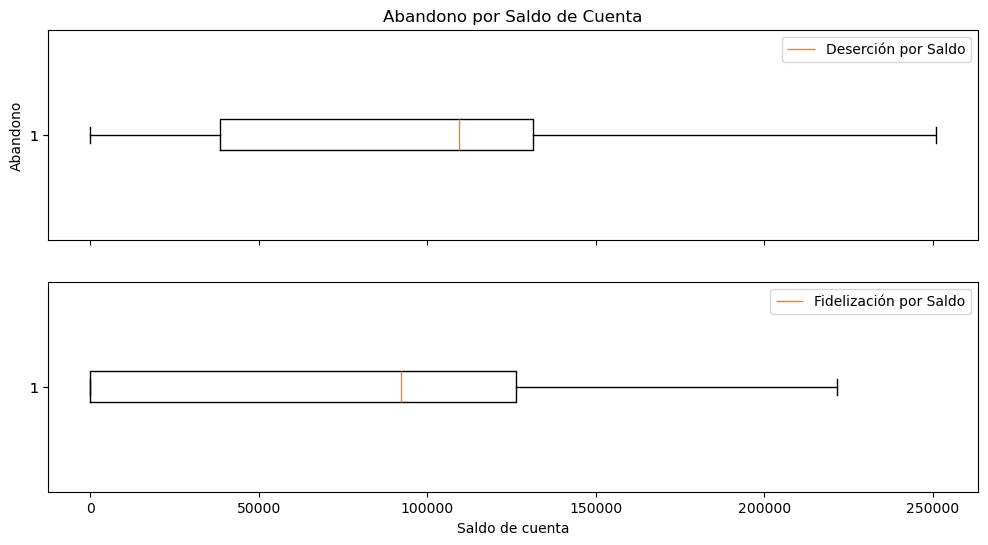

In [170]:
churn = df[df['churn'] == 1]
no_churn = df[df['churn'] == 0]

#fig, ax = plt.subplots(2, 1, figsize=(12, 12))

#ax= sns.boxplot(x="balance", data=churn)
#ax.set(xlabel='Saldo de la cuenta', ylabel='Abandono', title='Deserción por Balance')
#ax.grid()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True, sharey=True)
ax[0].boxplot(churn['balance'], label='Deserción por Saldo',vert=False)
ax[1].boxplot(no_churn['balance'], label='Fidelización por Saldo',vert=False)

ax[0].set_title('Abandono por Saldo de Cuenta') 
ax[1].set_xlabel('Saldo de cuenta')  
ax[0].set_ylabel('Abandono')

ax[0].legend()  
ax[1].legend()


Al contrario de lo que planteamos como premisa no existe relacion lineal entre el saldo de la cuenta y las deserciones, es decir a menos saldo no hay mayores deserciones. Si comparamos las deserciones(primer gráfico) con los clientes que se quedaron (segundo gráfico) vemos que los que se quedaron poseen valores en saldos iniciales mientras que los desertores no poseen saldo en ese percentil. Por otra partre vemos que la mediana tanto en el grupo que abandono como en el grupo que se quedo es muy similar. Lo que demuestra lo establecido en el primer párrafo. 
Por último podemos decir que no se ven datos atípicos ni outliers. 

### Deserción y Cantidad de Prodcutos

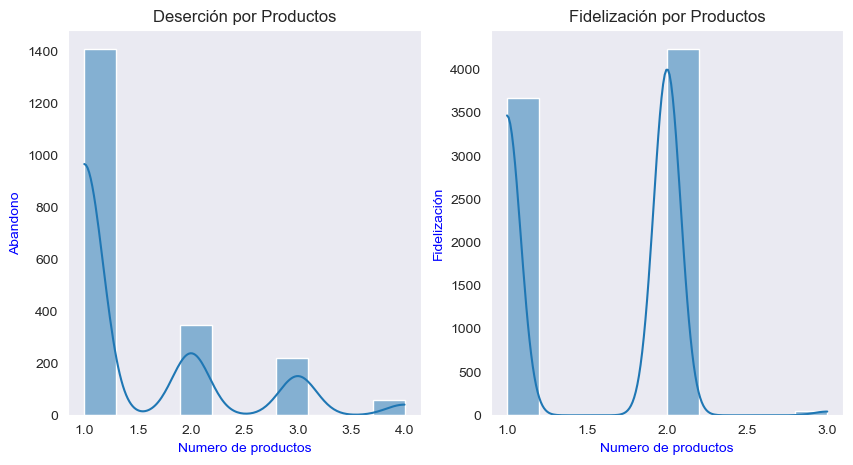

In [189]:
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "grey"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})
churn = df[df['churn'] == 1]
no_churn = df[df['churn'] == 0]

churn1= churn.sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax= sns.histplot(x="products_number", data=churn,ax=axes[0], bins=10,kde=True)
ax.set(xlabel='Numero de productos', ylabel='Abandono', title='Deserción por Productos')
ax.grid()

ax= sns.histplot(x="products_number", data=no_churn,ax=axes[1],bins=10, kde=True)
ax.set(xlabel='Numero de productos', ylabel='Fidelización', title='Fidelización por Productos')
ax.grid()



No es clara la relación entre la cantidad de productos y la deserción. Si bien en el primer gráfico se muestra que a menos productos hay mas deserción tambien en el gráfico de fidelización se muestra que muchos clientes con menos productos se quedan en el banco. Lo que sugiere que es el estrato con mayor cantidad de clientes. Luego tenemos que el pico de los que se quedan es con 2 productos. La relacion en si es irregular con variaciones poco claras que no siguen linealmente la relación.